In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score

# <font color = 'red'> ЛР 5. Простейший линейный классификатор - логистическая регрессия. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 16.10.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Логистическая регрессия.  </font>

**Логистическая регрессия** - модель машинного обучения для линейной классификации данных. Основная идея состоит в вычислении вероятности попадания объекта в один из двух классов(в случае бинарной классификации) и последующей классификации этого объекта с помощью порога вероятности.

Общий алгоритм можно описать так. 

1. Вычисляем зачение функции-регрессора для заданной функции $reg = \overline{w}^{T}\overline{x}$.
2. Вычисляем вероятность попадания в класс "1"  $p_{1} = \frac{1}{1+e^{-reg}}$.
3. Классифицируем объект в класс "1" в случае если $p_{1}>0.5$ (хотя порог можно взять другим) и в класс "0" в противоположном случае.

Подробнее изучить можно в конспекте лекции и по [ссылке](https://habr.com/ru/articles/485872/).

[[ 8.02517594 -7.99801519]]


array([-0.70468341])

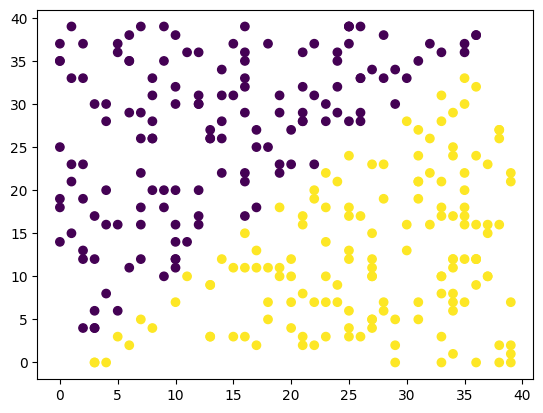

In [13]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
a = (inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск. 
2. Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции. 
3. Графически изобразите результаты классификации. Изобразите разделяющую гиперплоскость или кривую.
4. Попробуйте подобрать данные, которые станут проблемой (покажут низкое качество на валидации) для описанной модели.

In [33]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        """Сигмоидная функция активации"""
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_true, y_pred):
        """Функция потерь: бинарная кросс-энтропия"""
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        Обучение модели с использованием градиентного спуска
        :param X: матрица признаков (m x n)
        :param y: вектор меток (m x 1)
        """
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for i in range(self.num_iterations):
            # Предсказание
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Вычисление градиентов
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict_proba(self, X):
        """Вычисляет вероятность принадлежности к классу 1"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Предсказание классов на основе порога"""
        probabilities = self.predict_proba(X)
        return [1 if prob >= threshold else 0 for prob in probabilities]

manual_accuracy: 0.9830508474576272
sklearn_accuracy: 1.0


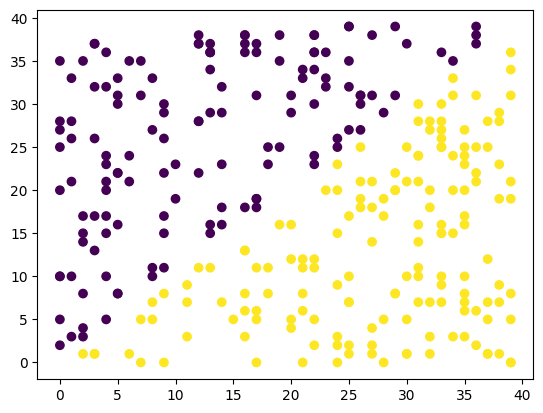

In [50]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X = X_data[rows]
y = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

plt.scatter(X[:,0],X[:,1],c = y);

# Обучение и тестирование модели
manual_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=1000)
manual_model.fit(X_train, y_train)
manual_predictions = manual_model.predict(X_test)
manual_accuracy = accuracy_score(y_test, manual_predictions)

# Сравнение со встроенной логистической регрессией
sklearn_model = LogisticRegression(penalty=None)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f'manual_accuracy: {manual_accuracy}\nsklearn_accuracy: {sklearn_accuracy}')

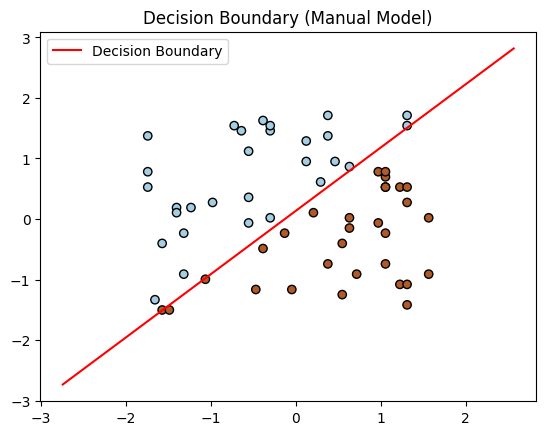

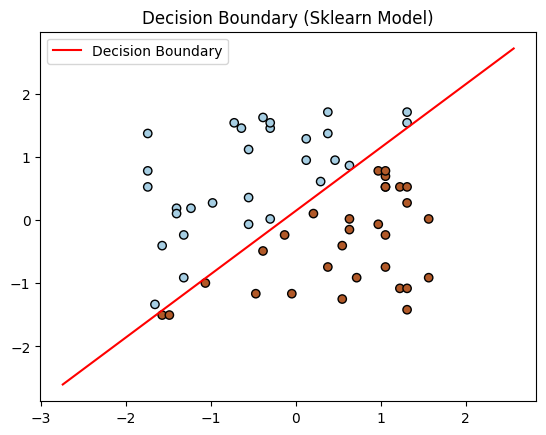

In [52]:
# Графическое изображение разделяющей прямой
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    
    # Параметры прямой
    weights = model.weights if hasattr(model, 'weights') else model.coef_[0]
    bias = model.bias if hasattr(model, 'bias') else model.intercept_[0]
    
    # Уравнение прямой: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
    if weights[1] != 0:  # Проверка, чтобы избежать деления на ноль
        yy = -(weights[0] * xx + bias) / weights[1]
        plt.plot(xx, yy, color='red', label='Decision Boundary')
    
    # Построение графика
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.legend()
    plt.show()

# График для вручную реализованной модели
plot_decision_boundary(manual_model, X_test, y_test, "Decision Boundary (Manual Model)")

# График для sklearn модели
plot_decision_boundary(sklearn_model, X_test, y_test, "Decision Boundary (Sklearn Model)")


manual_accuracy: 0.8
sklearn_accuracy: 0.8


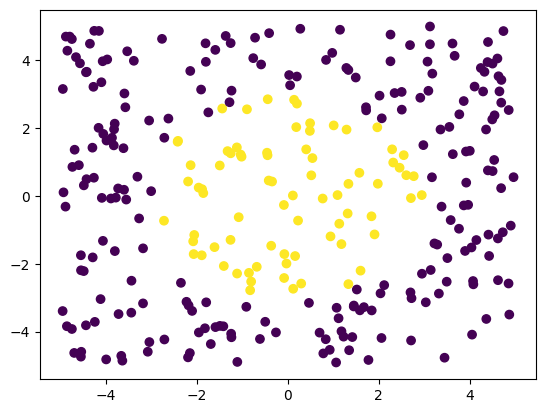

In [57]:
# Генерация данных, которые сложно линейно разделить (нелинейные данные)
np.random.seed(42)
def generate_non_linear_data(n_samples=300):
    X = np.random.uniform(-5, 5, (n_samples, 2))
    y = np.array([1 if x1**2 + x2**2 < 9 else 0 for x1, x2 in X])  # Окружность радиусом 3
    return X, y

X, y = generate_non_linear_data()

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Стандартизация данных
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Обучение и тестирование модели
manual_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=1000)
manual_model.fit(X_train, y_train)
manual_predictions = manual_model.predict(X_test)
manual_accuracy = accuracy_score(y_test, manual_predictions)

# Сравнение со встроенной логистической регрессией
sklearn_model = LogisticRegression(penalty=None)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f'manual_accuracy: {manual_accuracy}\nsklearn_accuracy: {sklearn_accuracy}')

plt.scatter(X[:,0],X[:,1],c = y);

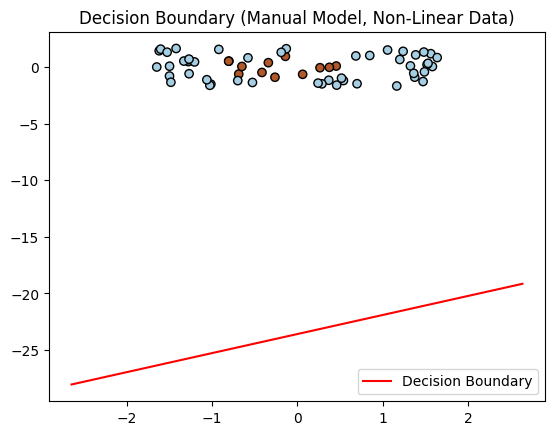

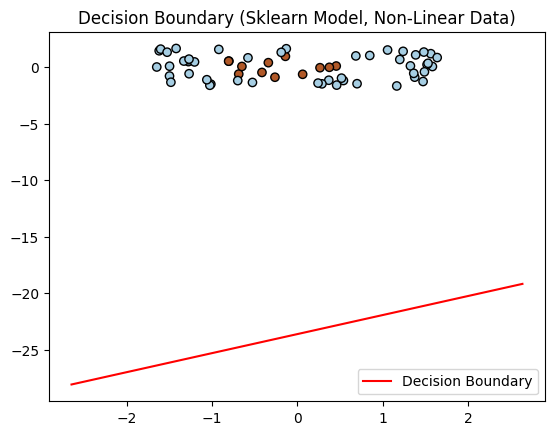

In [58]:
# График для вручную реализованной модели
plot_decision_boundary(manual_model, X_test, y_test, "Decision Boundary (Manual Model, Non-Linear Data)")

# График для sklearn модели
plot_decision_boundary(sklearn_model, X_test, y_test, "Decision Boundary (Sklearn Model, Non-Linear Data)")


<font color = 'red' size = 5>Задание 2 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода логистической регрессии из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Используйте регуляризацию, где необходимо. Определите оптимальный коэффициент регуляризации. 
6. Оцените качество модели с помощью ROC-кривых.

[ROC](https://loginom.ru/blog/logistic-regression-roc-auc)


##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

#####  3.3 Данные теста микрочипов

Используйте данные из файла microchip_tests.txt для предсказания брака микрочипов. Предварительно изучите и подготовьте данные. 

#####  3.4 Данные о сердечных болезнях

Используйте данные [о прогнозе болезней сердца](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression). Предварительно изучите и подготовьте данные. 
